<H1> Project - Wrangle and Analyze Data </H1>

In [1]:
import pandas as pd
import numpy as np
import requests
import os

<H2> Gathering data </H2>

First, I will read csv file "Twitter archive enhanced".

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Here, I will download the content of image predictions url and then read the tsv file.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', 'wb') as f:
    f.write(r.content)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep="\t")
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
import tweepy


In [78]:
# @hidden_cell
consumer_key = 'LXKh6SGvfMq0yUvGBrm6h0EYi'
consumer_secret = 'yFCxrI9UXHagdVOxM4S7gL8Lyv2ogg5vXQ43emEbKxNXszP2fO'
access_token = '155173647-CQbxm95Lg0DIa9oq8E1gbwjB98wWJ5Ns6zTVPZXd'
access_secret = '6vU7wkBtJuwEKcR8ew2Rfhyo4RDSPa2Zp2N2DgQlCHVSK'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
import json

In [ ]:
# if os.path.exists('tweet_json.txt'):
#     os.remove('tweet_json.txt')
for tw_id in twitter_archive.tweet_id:
    try:
        tweet = api.get_status(tw_id, tweet_mode='extended')
    #     tweets_json.append(tweet._json)
        with open("tweet_json.txt", "a+") as file_object:
            # Move read cursor to the start of file.
            file_object.seek(0)
            # If file is not empty then append '\n'
            data = file_object.read(100)
            if len(data) > 0 :
                file_object.write("\n")
            # Append text at the end of file
            json.dump(tweet._json, file_object)
        print('Tweet', tw_id, ' is downloaded')
    except:
        print("Tweet", tw_id, " can't be accessed, continuing")
# print(tweet.text)
#tweet.text

Rate limit reached. Sleeping for: 445
Tweet 892420643555336193  is downloaded
Tweet 892177421306343426  is downloaded
Tweet 891815181378084864  is downloaded
Tweet 891689557279858688  is downloaded
Tweet 891327558926688256  is downloaded
Tweet 891087950875897856  is downloaded
Tweet 890971913173991426  is downloaded
Tweet 890729181411237888  is downloaded
Tweet 890609185150312448  is downloaded
Tweet 890240255349198849  is downloaded
Tweet 890006608113172480  is downloaded
Tweet 889880896479866881  is downloaded
Tweet 889665388333682689  is downloaded
Tweet 889638837579907072  is downloaded
Tweet 889531135344209921  is downloaded
Tweet 889278841981685760  is downloaded
Tweet 888917238123831296  is downloaded
Tweet 888804989199671297  is downloaded
Tweet 888554962724278272  is downloaded
Tweet 888202515573088257  can't be accessed, continuing
Tweet 888078434458587136  is downloaded
Tweet 887705289381826560  is downloaded
Tweet 887517139158093824  is downloaded
Tweet 887473957103951883  

Tweet 853639147608842240  is downloaded
Tweet 853299958564483072  is downloaded
Tweet 852936405516943360  is downloaded
Tweet 852912242202992640  is downloaded
Tweet 852672615818899456  is downloaded
Tweet 852553447878664193  is downloaded
Tweet 852311364735569921  is downloaded
Tweet 852226086759018497  is downloaded
Tweet 852189679701164033  is downloaded
Tweet 851953902622658560  can't be accessed, continuing
Tweet 851861385021730816  is downloaded
Tweet 851591660324737024  is downloaded
Tweet 851464819735769094  is downloaded
Tweet 851224888060895234  is downloaded
Tweet 850753642995093505  is downloaded
Tweet 850380195714523136  is downloaded
Tweet 850333567704068097  is downloaded
Tweet 850145622816686080  is downloaded
Tweet 850019790995546112  is downloaded
Tweet 849776966551130114  is downloaded
Tweet 849668094696017920  is downloaded
Tweet 849412302885593088  is downloaded
Tweet 849336543269576704  is downloaded
Tweet 849051919805034497  is downloaded
Tweet 848690551926992896

Tweet 823939628516474880  is downloaded
Tweet 823719002937630720  is downloaded
Tweet 823699002998870016  is downloaded
Tweet 823581115634085888  is downloaded
Tweet 823333489516937216  is downloaded
Tweet 823322678127919110  is downloaded
Tweet 823269594223824897  is downloaded
Tweet 822975315408461824  is downloaded
Tweet 822872901745569793  is downloaded
Tweet 822859134160621569  is downloaded
Tweet 822647212903690241  is downloaded
Tweet 822610361945911296  is downloaded
Tweet 822489057087389700  is downloaded
Tweet 822462944365645825  is downloaded
Tweet 822244816520155136  is downloaded
Tweet 822163064745328640  is downloaded
Tweet 821886076407029760  is downloaded
Tweet 821813639212650496  is downloaded
Tweet 821765923262631936  is downloaded
Tweet 821522889702862852  is downloaded
Tweet 821421320206483457  is downloaded
Tweet 821407182352777218  is downloaded
Tweet 821153421864615936  is downloaded
Tweet 821149554670182400  is downloaded
Tweet 821107785811234820  is downloaded


Tweet 797165961484890113  is downloaded
Tweet 796904159865868288  is downloaded
Tweet 796865951799083009  is downloaded
Tweet 796759840936919040  is downloaded
Tweet 796563435802726400  is downloaded
Tweet 796484825502875648  is downloaded
Tweet 796387464403357696  is downloaded
Tweet 796177847564038144  is downloaded
Tweet 796149749086875649  is downloaded
Tweet 796125600683540480  is downloaded
Tweet 796116448414461957  is downloaded
Tweet 796080075804475393  is downloaded
Tweet 796031486298386433  is downloaded
Tweet 795464331001561088  is downloaded
Tweet 795400264262053889  is downloaded
Tweet 795076730285391872  is downloaded
Tweet 794983741416415232  is downloaded
Tweet 794926597468000259  is downloaded
Tweet 794355576146903043  is downloaded
Tweet 794332329137291264  is downloaded
Tweet 794205286408003585  is downloaded
Tweet 793962221541933056  is downloaded
Tweet 793845145112371200  is downloaded
Tweet 793614319594401792  is downloaded
Tweet 793601777308463104  is downloaded


Tweet 770787852854652928  is downloaded
Tweet 770772759874076672  is downloaded
Tweet 770743923962707968  can't be accessed, continuing
Tweet 770655142660169732  is downloaded
Tweet 770414278348247044  is downloaded
Tweet 770293558247038976  is downloaded
Tweet 770093767776997377  is downloaded
Tweet 770069151037685760  is downloaded
Tweet 769940425801170949  is downloaded
Tweet 769695466921623552  is downloaded
Tweet 769335591808995329  is downloaded
Tweet 769212283578875904  is downloaded
Tweet 768970937022709760  is downloaded
Tweet 768909767477751808  is downloaded
Tweet 768855141948723200  is downloaded
Tweet 768609597686943744  is downloaded
Tweet 768596291618299904  is downloaded
Tweet 768554158521745409  is downloaded
Tweet 768473857036525572  is downloaded
Tweet 768193404517830656  is downloaded
Tweet 767884188863397888  is downloaded
Tweet 767754930266464257  is downloaded
Tweet 767500508068192258  is downloaded
Tweet 767191397493538821  is downloaded
Tweet 767122157629476866

Tweet 746790600704425984  is downloaded
Tweet 746757706116112384  is downloaded
Tweet 746726898085036033  is downloaded
Tweet 746542875601690625  is downloaded
Tweet 746521445350707200  is downloaded
Tweet 746507379341139972  is downloaded
Tweet 746369468511756288  is downloaded
Tweet 746131877086527488  is downloaded
Tweet 746056683365994496  is downloaded
Tweet 745789745784041472  is downloaded
Tweet 745712589599014916  is downloaded
Tweet 745433870967832576  is downloaded
Tweet 745422732645535745  is downloaded
Tweet 745314880350101504  is downloaded
Tweet 745074613265149952  is downloaded
Tweet 745057283344719872  is downloaded
Tweet 744995568523612160  is downloaded
Tweet 744971049620602880  is downloaded
Tweet 744709971296780288  is downloaded
Tweet 744334592493166593  is downloaded
Tweet 744234799360020481  is downloaded
Tweet 744223424764059648  is downloaded
Tweet 743980027717509120  is downloaded
Tweet 743895849529389061  is downloaded
Tweet 743835915802583040  is downloaded


Tweet 714214115368108032  is downloaded
Tweet 714141408463036416  is downloaded
Tweet 713919462244790272  is downloaded
Tweet 713909862279876608  is downloaded
Tweet 713900603437621249  is downloaded
Tweet 713761197720473600  is downloaded
Tweet 713411074226274305  is downloaded
Tweet 713177543487135744  is downloaded
Tweet 713175907180089344  is downloaded
Tweet 712809025985978368  is downloaded
Tweet 712717840512598017  is downloaded
Tweet 712668654853337088  is downloaded
Tweet 712438159032893441  is downloaded
Tweet 712309440758808576  is downloaded
Tweet 712097430750289920  is downloaded
Tweet 712092745624633345  is downloaded
Tweet 712085617388212225  is downloaded
Tweet 712065007010385924  is downloaded
Tweet 711998809858043904  is downloaded
Tweet 711968124745228288  is downloaded
Tweet 711743778164514816  is downloaded
Tweet 711732680602345472  is downloaded
Tweet 711694788429553666  is downloaded
Tweet 711652651650457602  is downloaded
Tweet 711363825979756544  is downloaded


Tweet 697575480820686848  is downloaded
Tweet 697516214579523584  is downloaded
Tweet 697482927769255936  is downloaded
Tweet 697463031882764288  is downloaded
Tweet 697270446429966336  is downloaded
Tweet 697259378236399616  is downloaded
Tweet 697255105972801536  is downloaded
Tweet 697242256848379904  is downloaded
Tweet 696900204696625153  is downloaded
Tweet 696894894812565505  is downloaded
Tweet 696886256886657024  is downloaded
Tweet 696877980375769088  is downloaded
Tweet 696754882863349760  is downloaded
Tweet 696744641916489729  is downloaded
Tweet 696713835009417216  is downloaded
Tweet 696518437233913856  is downloaded
Tweet 696490539101908992  is downloaded
Tweet 696488710901260288  is downloaded
Tweet 696405997980676096  is downloaded
Tweet 696100768806522880  is downloaded
Tweet 695816827381944320  is downloaded
Tweet 695794761660297217  is downloaded
Tweet 695767669421768709  is downloaded
Tweet 695629776980148225  is downloaded
Tweet 695446424020918272  is downloaded


Tweet 684200372118904832  is downloaded
Tweet 684195085588783105  is downloaded
Tweet 684188786104872960  is downloaded
Tweet 684177701129875456  is downloaded
Tweet 684147889187209216  is downloaded
Tweet 684122891630342144  is downloaded
Tweet 684097758874210310  is downloaded
Tweet 683857920510050305  is downloaded
Tweet 683852578183077888  is downloaded
Tweet 683849932751646720  is downloaded
Tweet 683834909291606017  is downloaded
Tweet 683828599284170753  is downloaded
Tweet 683773439333797890  is downloaded
Tweet 683742671509258241  is downloaded
Tweet 683515932363329536  is downloaded
Tweet 683498322573824003  is downloaded
Tweet 683481228088049664  is downloaded
Tweet 683462770029932544  is downloaded
Tweet 683449695444799489  is downloaded
Tweet 683391852557561860  is downloaded
Tweet 683357973142474752  is downloaded
Tweet 683142553609318400  is downloaded
Tweet 683111407806746624  is downloaded
Tweet 683098815881154561  is downloaded
Tweet 683078886620553216  is downloaded


Now, I will read the text file using the pandas read_json function.

In [7]:
tweet_json = pd.read_json('tweet_json.txt', lines=True)

Since for this project I only need tweet id, favorite count and retweet count columns, I will use .loc function to make a new dataframe with only those columns. 

In [8]:
tweet_json_full = tweet_json.loc[:, ['id', 'favorite_count', 'retweet_count']]

In [9]:
tweet_json_full.head()

,id,favorite_count,retweet_count
0,892420643555336193,35816,7580
1,892177421306343426,30921,5622
2,891815181378084864,23259,3720
3,891689557279858688,39080,7765
4,891327558926688256,37336,8359


<H2>Assessing Data</H2>

Now, when I have prepared all necessary dataframes for this project, I will focus on detecting quality and tideness issues among them in order to be able to fix them in the next part and prepare dataframes for data analysis process.

The next cell will contain those issues that I will update each time after visually or programatically detect them. 

Eight <b>quality</b> issues:
<ul>
    <li>Column Source in twitter_archive has all links the same.</li>
    <li>In twitter_archive, the column timestamp is string instead of being datetime.</li>
    <li>In twitter_archive, the column Text has unnecessary information such as ratings and links.</li>
    <li>In twitter_archive, the column Name has some string values that do not represent the names of dogs. For example: such, quite, a.</li>
    <li>In twitter_archive, the columns Rating_numerator and Rating_denominator have some wrong values.</li>
    <li>Missing values in a couple of columns in twitter_archive</li>
    <li>In image_predictions, the columns p1, p2, and p3 have some capitalized string values, some not.</li>
    <li>In image_predictions, the columns p1, p2, and p3 have some string values with underscore and some of them not.</li>
</ul>
    
Two <b>tidiness</b> issues:
<ul>
    <li>The last four columns in twitter_archive: doggo, floofer, pupper, and puppo should be organized as one column whit those 4 categories.</li>
    <li>Tweet_json_full dataframe should be combine with twitter_archive.</li>
</ul>

In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
twitter_archive['source'][2335]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [12]:
twitter_archive.loc[2335, :]

tweet_id                                                     666287406224695296
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-11-16 16:11:11 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is an Albanian 3 1/2 legged  Episcopalian...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/666287406...
rating_numerator                                                              1
rating_denominator                                                            2
name                                    

In [13]:
twitter_archive['text'][2335]

'This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv'

In [14]:
twitter_archive['text'][7]

"When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq"

In [15]:
twitter_archive['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
tweet_json_full

,id,favorite_count,retweet_count
0,892420643555336193,35816,7580
1,892177421306343426,30921,5622
2,891815181378084864,23259,3720
3,891689557279858688,39080,7765
4,891327558926688256,37336,8359
5,891087950875897856,18815,2806
6,890971913173991426,10931,1825
7,890729181411237888,60319,16952
8,890609185150312448,25897,3858
9,890240255349198849,29573,6599


In [18]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
type(twitter_archive['timestamp'][0])

str

In [21]:
tweet_json_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1775 entries, 0 to 1774
Data columns (total 3 columns):
id                1775 non-null int64
favorite_count    1775 non-null int64
retweet_count     1775 non-null int64
dtypes: int64(3)
memory usage: 41.7 KB


In [22]:
image_predictions['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound', 'Maltese_dog', 'three-toed_sloth', 'ox',
       'malamute', 'guinea_pig', 'soft-coated_wheaten_terrier',
       'Chihuahua', 'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama', 'Chesapeake_Bay_retriever',
       'curly-coated_retriever', 'dalmatian', 'Ibizan_hound',
       'Border_collie', 'Labrador_retriever', 'seat_belt', 'snail',
       'miniature_schnauzer', 'Airedale', 'triceratops', 'swab', 'hay',
       'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 'teddy', 

In [23]:
print(sum(twitter_archive.duplicated()))
print(sum(image_predictions.duplicated()))
print(sum(tweet_json_full.duplicated()))

0
0
0


<h2>Cleaning data</h2>

Eight <b>quality</b> issues:
<ul>
    <li>The column Source in twitter_archive should be dropped since all the values are the same.</li>
    <li>The data type of column Timestamp in twitter_archive should be changed from object (string) to datatime.</li>
    <li>From column Name in twitter_archive string values that do not represent names will be deleted. Those include: such, quite, a, an.</li>
    <li>The wrong values in the columns Rating_nominator and Rating_denominator in twitter_archive will be changed according to their ratings in Text column.</li>
    <li>Unnecessary information (ratings and links) in the column Text in twitter_archive should be removed.</li>
    <li>The columns in twitter_archive that have a lot of missing values will be dropped.</li>
    <li>The columns p1, p2, and p3 in image_predictions will be fixed to have the first letter capitalized.</li>
    <li>The columns p1, p2, and p3 in image_predictions will be fixed not to have underscore in some rows.</li>
</ul>
    
Two <b>tidiness</b> issues:
<ul>
    <li>The last four columns in twitter_archive: doggo, floofer, pupper, will be organized as one column whit those 4 categories.</li>
    <li>Tweet_json_full dataframe will be combined with twitter_archive.</li>
</ul>

<h3>Quality Issues</h3>

<b>1st issue:</b> The column Source in twitter_archive should be dropped since all the values are the same.

In [24]:
twitter_archive_cleaned = twitter_archive.drop(columns=['source'])
twitter_archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<b>2nd issue:</b> The data type of column Timestamp in twitter_archive should be changed from object (string) to datatime.

In [25]:
twitter_archive_cleaned['timestamp']= pd.to_datetime(twitter_archive_cleaned['timestamp'])
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(3), object(8)
memory usage: 29

<b>3rd issue:</b> From column Name in twitter_archive string values that do not represent names will be deleted. Those include: such, quite, a, an - everything where the first letter is not capitalized. Moreover, None values will be changed to NaN. 

In [26]:
twitter_archive_cleaned.loc[twitter_archive_cleaned['name'] == twitter_archive_cleaned['name'].str.lower(), 'name'] = np.nan

In [27]:
twitter_archive_cleaned.loc[twitter_archive_cleaned['name'] == 'None', 'name'] = np.nan

In [28]:
twitter_archive_cleaned

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


<b>4th issue:</b> The wrong values in the columns Rating_nominator and Rating_denominator in twitter_archive will be changed according to their ratings in Text column.

In [29]:
import re

I will extract the rating score from the text using regular expression in for loop. After finding the values, the code will split the rating score into two values but always using the last occurence if there are more / characters. They it will save those values into two columns in twitter_archive_cleaned.

In [30]:
for i in range(twitter_archive_cleaned.shape[0]):
    s_temp = re.findall(r'\d+\/\d+', twitter_archive_cleaned['text'][i])
    s_two = s_temp[-1].split('/')
    twitter_archive_cleaned.loc[i,'rating_numerator'] = int(s_two[0])
    twitter_archive_cleaned.loc[i,'rating_denominator'] = int(s_two[1])

In [31]:
twitter_archive_cleaned

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


<b>6th issue:</b> The columns in twitter_archive that have a lot of missing values will be dropped since they are not crucial for data analysis.

In [32]:
twitter_archive_cleaned = twitter_archive_cleaned.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' ])
twitter_archive_cleaned.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<b>7th issue:</b> The columns p1, p2, and p3 in image_predictions will be fixed to have the first letter capitalized. 

In [33]:
image_predictions_cleaned = image_predictions.copy()

In [34]:
image_predictions_cleaned['p1'] = image_predictions_cleaned['p1'].str.capitalize()
image_predictions_cleaned['p2'] = image_predictions_cleaned['p2'].str.capitalize()
image_predictions_cleaned['p3'] = image_predictions_cleaned['p3'].str.capitalize()

<b>8th issue:</b> The columns p1, p2, and p3 in image_predictions will be fixed not to have underscore in some rows.

In [35]:
image_predictions_cleaned['p1'].replace('_', ' ', regex=True, inplace=True) 
image_predictions_cleaned['p2'].replace('_', ' ', regex=True, inplace=True) 
image_predictions_cleaned['p3'].replace('_', ' ', regex=True, inplace=True) 

In [36]:
image_predictions_cleaned

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater swiss mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box turtle,0.933012,False,Mud turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,Fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping cart,0.962465,False,Shopping basket,0.014594,False,Golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature poodle,0.201493,True,Komondor,0.192305,True,Soft-coated wheaten terrier,0.082086,True


 <h3>Tidness issues</h3>

<b>1st issue:</b> The new column in twitter_archive_cleaned will be made with 4 different categories for doggo, floofer, pupper, and puppo and then the old columns will be dropped.

In [37]:
temp = ""
twitter_archive_cleaned['type_of_dog'] = np.nan
for i in range(twitter_archive_cleaned.shape[0]):
    if twitter_archive_cleaned.loc[i, "doggo"] == 'doggo':
        temp = 'doggo'
    elif twitter_archive_cleaned.loc[i, "floofer"] == 'floofer':
        temp = 'floofer'
    elif twitter_archive_cleaned.loc[i, "pupper"] == 'pupper':
        temp = 'pupper'
    elif twitter_archive_cleaned.loc[i, "puppo"] == 'puppo':
        temp = 'puppo'
    else:
        temp = np.nan
    twitter_archive_cleaned.loc[i, 'type_of_dog'] = temp
twitter_archive_cleaned.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [38]:
twitter_archive_cleaned

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


<b>2nd issue:</b> All three dataframes will be combined.

In [39]:
tweet_json_full_cleaned = tweet_json_full.copy()

In [40]:
tweet_json_full_cleaned.rename(columns={'id': 'tweet_id'}, inplace=True)

In [49]:
twitter_archive_master = pd.merge(pd.merge(twitter_archive_cleaned, tweet_json_full_cleaned, on='tweet_id'), image_predictions_cleaned, on='tweet_id')

In [50]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518 entries, 0 to 1517
Data columns (total 21 columns):
tweet_id              1518 non-null int64
timestamp             1518 non-null datetime64[ns]
text                  1518 non-null object
expanded_urls         1518 non-null object
rating_numerator      1518 non-null int64
rating_denominator    1518 non-null int64
name                  1088 non-null object
type_of_dog           277 non-null object
favorite_count        1518 non-null int64
retweet_count         1518 non-null int64
jpg_url               1518 non-null object
img_num               1518 non-null int64
p1                    1518 non-null object
p1_conf               1518 non-null float64
p1_dog                1518 non-null bool
p2                    1518 non-null object
p2_conf               1518 non-null float64
p2_dog                1518 non-null bool
p3                    1518 non-null object
p3_conf               1518 non-null float64
p3_dog                1518 non-nu

In [51]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

<h2>Data Analysis and Visualization</h2>

After grouping the results based on type of dog, we can see that the average rating score is the highest for floofer and puppo.

In [52]:
twitter_archive_master.groupby('type_of_dog')['rating_numerator'].mean()

type_of_dog
doggo      11.833333
floofer    12.000000
pupper     10.964497
puppo      12.000000
Name: rating_numerator, dtype: float64

Type of dog that has the highest average number of retweeted posts is doggo. 

In [53]:
twitter_archive_master.groupby('type_of_dog')['retweet_count'].mean()

type_of_dog
doggo      6833.397436
floofer    4293.000000
pupper     2471.420118
puppo      5697.043478
Name: retweet_count, dtype: float64

The most common names of dogs are Cooper, Charlie, Tucker, and Oliver.

In [54]:
counts = twitter_archive_master.groupby('name').count()['tweet_id']
counts.sort_values(ascending=False).head()


name
Cooper     9
Charlie    9
Tucker     9
Oliver     9
Penny      8
Name: tweet_id, dtype: int64

In [55]:
twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,type_of_dog,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,35816,7580,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,30921,5622,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,23259,3720,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,39080,7765,...,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,37336,8359,...,2,Basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True


From the figure below we can observe that the profile we are analyzing is gaining popularity throughout time.

In [64]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

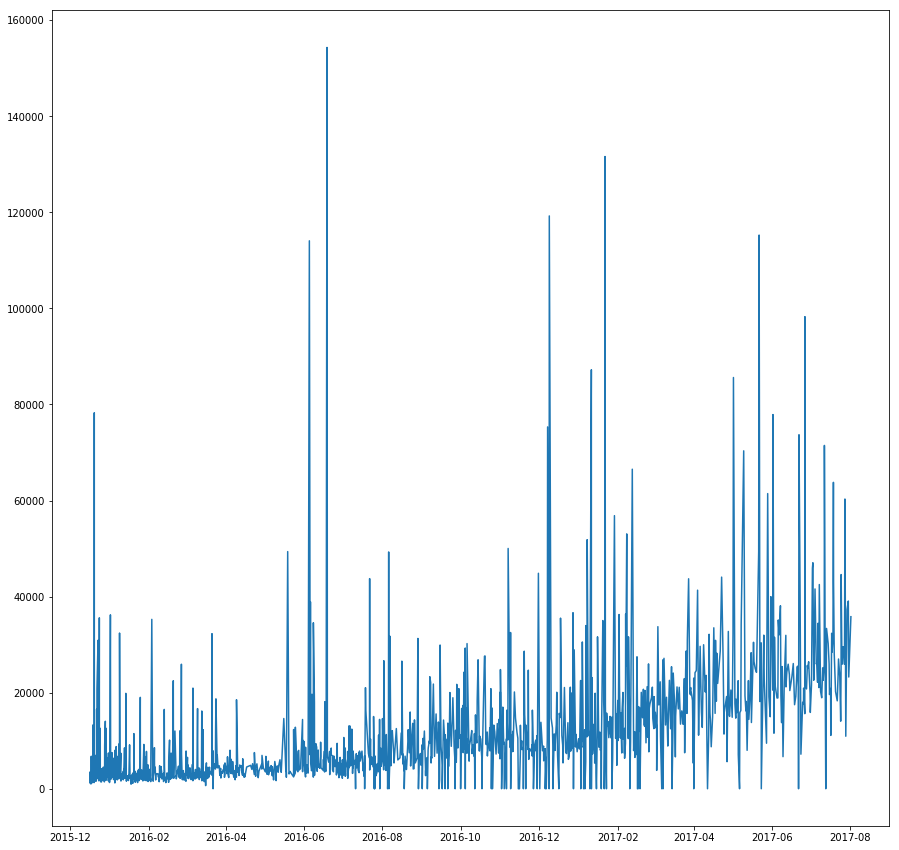

In [73]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(twitter_archive_master.timestamp,
        twitter_archive_master.favorite_count)